# INF-510, v0.32, Claudio Torres, ctorres@inf.utfsm.cl. DI-UTFSM
## Textbook: Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM, Philadelphia, 2000

# More on Spectral Matrices

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.sparse.linalg as sp
from sympy import *
import sympy as sym
from scipy.linalg import toeplitz
# The variable M is used for changing the default size of the figures
M=8
import ipywidgets as widgets
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
sym.init_printing()

def plot_matrices_with_values(ax,M):
    N=M.shape[0]
    cmap = plt.get_cmap('GnBu')
    ax.matshow(M, cmap=cmap)
    for i in np.arange(0, N):
        for j in np.arange(0, N):
            ax.text(i, j, '{:.2f}'.format(M[i,j]), va='center', ha='center', color='r')

## "The magical and beautiful sinc function" by ?

In [3]:
def Sh(x,h):
    if np.abs(x)<=1e-10:
        return 1.0
    else:
        y=np.pi*x/h
        return np.sin(y)/y
Shv = np.vectorize(Sh) 

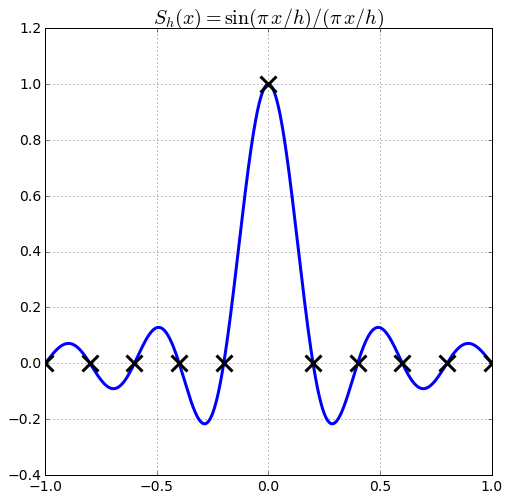

In [4]:
N=10
h=2/N
x=np.linspace(-1,1,1e4)

xx=np.linspace(-1,1,N+1)
yy=np.zeros(N+1)
yy[int(N/2)]=1

plt.figure(figsize=(M,M))
plt.plot(x,Shv(x,h),'-',linewidth=3)
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)
plt.title('$S_h(x)=\sin(\pi\,x/h)/(\pi\,x/h)$',fontsize=20)
plt.show()

## Just interpolating a few functions

In [5]:
def Interpolate_with_Sh(xx,h,N,yy,x):
    out=np.zeros(x.shape[0])
    for i in np.arange(N+1):
        out+=yy[i]*Shv(x-xx[i],h)
    return out

In [8]:
N=20
h=2./N
# Variable for plotting 'continuously'
x=np.linspace(-1,1,1e4)
# Creating the hZ mesh
xx=np.linspace(-1,1,N+1)
# Creating some grid functions
yy1=1.*(np.abs(xx)<=0.3)
yy2=(1.0-np.abs(xx)/0.3)*(1.*(1.0-np.abs(xx)/0.3>=0))

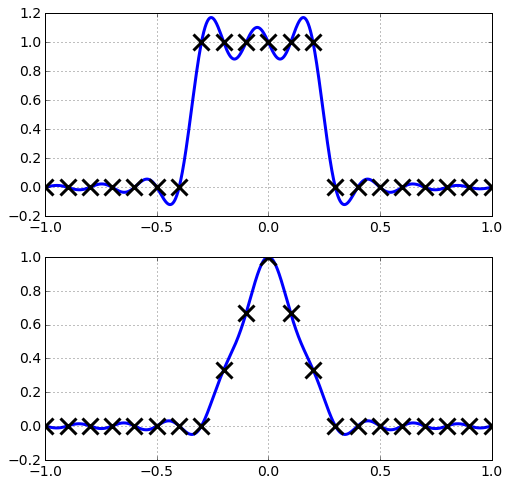

In [9]:
plt.figure(figsize=(M,M))

plt.subplot(211)
yy=yy1
plt.plot(x,Interpolate_with_Sh(xx,h,N,yy,x),'-',linewidth=3)
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(212)
yy=yy2
plt.plot(x,Interpolate_with_Sh(xx,h,N,yy,x),'-',linewidth=3)
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)
plt.show()

## Band limited interpolant

In [10]:
def ShBL(x,h):
    # Why do I need to do this?
    if np.abs(x)<=1e-10:
        return 1.0+(-(1./12.)-np.pi**2/(6.*h**2))*x**2
    elif np.abs(x-2*np.pi)<=1e-10:
        return 1.0+(-(1./12.)-np.pi**2/(6.*h**2))*(x-2*np.pi)**2
    else:
        y=np.pi*x/h
        return np.sin(y)/((2*np.pi/h)*np.tan(x/2))
ShBLv = np.vectorize(ShBL)

def Interpolate_with_ShBL(xx,h,N,yy,x):
    out=np.zeros(x.shape[0])
    for i in np.arange(N):
        out+=yy[i]*ShBLv(x-xx[i],h)
    return out

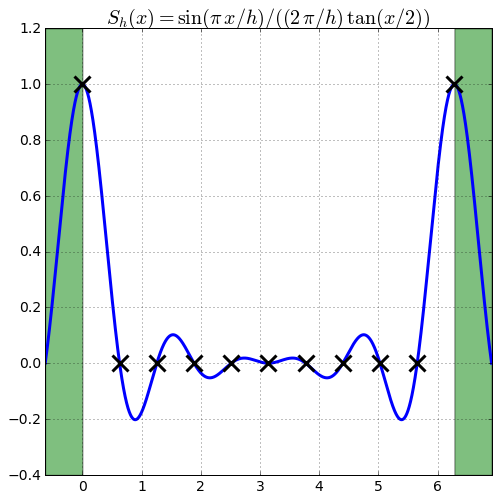

In [11]:
N=10
h=2*np.pi/N
x=np.linspace(0-h,2*np.pi+h,1e4)

xx=np.linspace(0,2*np.pi,N+1)
yy=np.zeros(N+1)
yy[0]=1
yy[-1]=1

fig, ax = plt.subplots(figsize=(M,M))
ax.plot(x,ShBLv(x,h),'-',linewidth=3)
ax.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
ax.grid(True)
plt.xlim([0-h,2*np.pi+h])
plt.ylim([-0.4,1.2])
plt.title('$S_h(x) = \sin(\pi\,x/h)/((2\,\pi/h)\,\\tan(x/2))$',fontsize=20)
ax.fill_between(x, -0.4, 1.2, where=(x < 0.0), facecolor='green', alpha=0.5)
ax.fill_between(x, -0.4, 1.2, where=(x > 2*np.pi), facecolor='green', alpha=0.5)
plt.show()

In [13]:
def my_D_spec(N):
    h=(2./N)*np.pi
    c=np.zeros(N)
    j=np.arange(1,N)
    c[1:]=0.5*((-1)**j)*(np.tan(j*h/2.)**(-1))
    r=np.zeros(N)
    r[0]=c[0]
    r[1:]=c[-1:0:-1]
    D=np.pi*toeplitz(c,r=r)
    return D

# This is almost the same as the previous notebook but with a 2*np.pi coefficient removed (Why?!).
def my_D_spec_2pi(N):
    h=(2./N)*np.pi
    c=np.zeros(N)
    j=np.arange(1,N)
    c[1:]=0.5*((-1)**j)*(np.tan(j*h/2.)**(-1))
    r=np.zeros(N)
    r[0]=c[0]
    r[1:]=c[-1:0:-1]
    D=toeplitz(c,r=r)
    return D

## Spectral derivative again

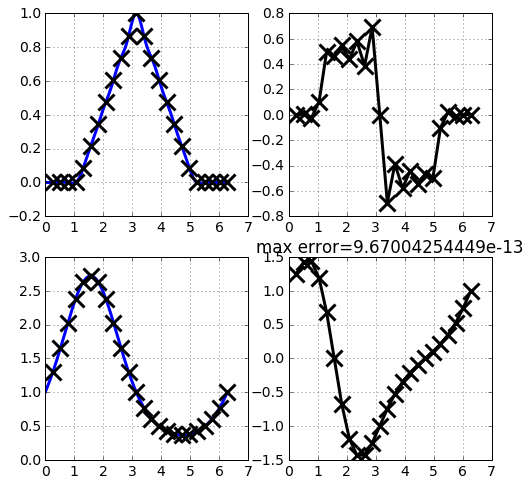

In [14]:
N=24
h=2.*np.pi/N
# Variable for plotting 'continuously'
x=np.linspace(0,2*np.pi,1e4)
# Creating the hZ mesh
xx=np.linspace(0,2*np.pi,N+1)[1:]
# Creating the grid functions
yy0=1.0-np.abs(xx-np.pi)/2
yy1=(yy0)*(1.*(yy0>=0))
yy2=np.exp(np.sin(xx))

D=my_D_spec_2pi(N)

plt.figure(figsize=(M,M))

plt.subplot(221)
yy=yy1
plt.plot(x,Interpolate_with_ShBL(xx,h,N,yy,x),'-',linewidth=3)
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(222)
plt.plot(xx,np.dot(D,yy),'kx-',markersize=16,markeredgewidth=3,linewidth=3)
plt.grid(True)

plt.subplot(223)
yy=yy2
plt.plot(x,Interpolate_with_ShBL(xx,h,N,yy,x),'-',linewidth=3)
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(224)
plt.plot(xx,np.dot(D,yy),'kx-',markersize=16,markeredgewidth=3,linewidth=3)
error_max=np.max(np.abs(yy*np.cos(xx)-np.dot(D,yy)))
plt.title('max error='+str(error_max))
plt.grid(True)

plt.show()

## Using FFT for the same task!

In [15]:
N=10
K=np.fft.fftfreq(N)*N
print(K)

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]


In [18]:
def my_first_implementation_of_derivative_with_FFT(yy):
    N=yy.shape[0]
    # Frequencies of fft
    K=np.fft.fftfreq(N)*N
    # i*K
    iK=1j*K
    # FFT
    v_hat = np.fft.fft(yy)
    # The actual derivative in Fourier space!
    w_hat = iK*v_hat
    # Taking care of the loss of symmetry
    w_hat[int(N/2)]=0
    # Coming back to the physical space
    ww    = np.real(np.fft.ifft(w_hat))

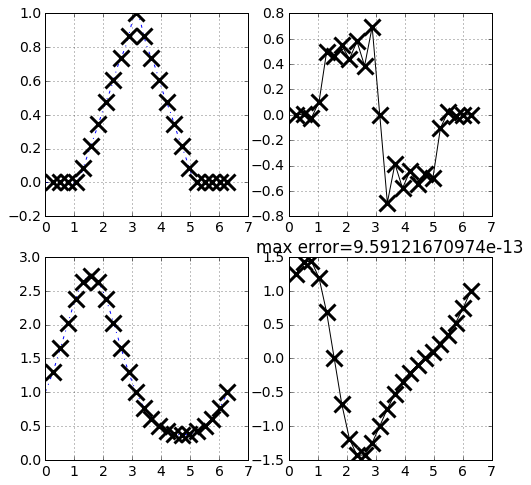

In [20]:
N=24
h=2.*np.pi/N
# Variable for plotting 'continuously'
x=np.linspace(0,2*np.pi,1e4)
# Creating the hZ mesh
xx=np.linspace(2*np.pi/N,2*np.pi,N)
# Creating the grid functions
yy0=1.0-np.abs(xx-np.pi)/2
yy1=(yy0)*(1.*(yy0>=0))
yy2=np.exp(np.sin(xx))

# Pre-computing the wave numbers in np.fft.fft
# K=1j*np.hstack((np.arange(0,N/2+1), np.arange(-N/2+1,0)))
K=np.fft.fftfreq(N)*N
iK=1j*K

plt.figure(figsize=(M,M))

plt.subplot(221)
yy=yy1
plt.plot(x,Interpolate_with_ShBL(xx,h,N,yy,x),'-.')
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(222)
# Begin derivative by DFT, i.e. FFT!
v_hat = np.fft.fft(yy)
w_hat = iK*v_hat
w_hat[int(N/2)]=0
ww    = np.real(np.fft.ifft(w_hat))
# End derivative by DFT, i.e. FFT!
plt.plot(xx,ww,'kx-',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(223)
yy=yy2
plt.plot(x,Interpolate_with_ShBL(xx,h,N,yy,x),'-.')
plt.plot(xx,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(224)
# Begin derivative by DFT, i.e. FFT!
v_hat = np.fft.fft(yy)
w_hat = iK*v_hat
w_hat[int(N/2)]=0
ww    = np.real(np.fft.ifft(w_hat))
# Begin derivative by DFT, i.e. FFT!
plt.plot(xx,ww,'kx-',markersize=16,markeredgewidth=3)
error_max=np.max(np.abs(yy*np.cos(xx)-ww))
plt.title('max error='+str(error_max))
plt.grid(True)

plt.show()

# Chebyshev differentiation matrix

[  1.00000000e+00   9.23879533e-01   7.07106781e-01   3.82683432e-01
   6.12323400e-17  -3.82683432e-01  -7.07106781e-01  -9.23879533e-01
  -1.00000000e+00]


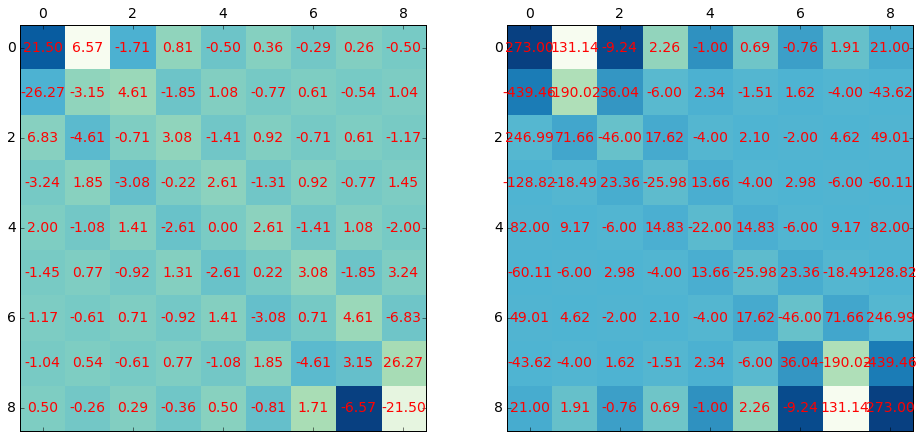

In [3]:
def cheb(N):
    if N==0:
        D=0
        x=1
        return D,x
    x = np.cos(np.pi*np.arange(N+1)/N)
    c=np.hstack((2,np.ones(N-1),2))*((-1.)**np.arange(N+1))
    X=np.tile(x,(N+1,1)).T
    dX=X-X.T
    D = np.outer(c,1./c)/(dX+np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    return D,x
def show_cheb(N):
    D,x=cheb(N)
    print(x)
    # We multiply by h just to cancel out its dependency   
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2*M,M))
    # First derivative
    plot_matrices_with_values(ax1,D)
    # 'Second' derivative
    plot_matrices_with_values(ax2,np.dot(D,D))
    plt.show()
    
widgets.interact(show_cheb,N=(0,10,1))

## Chebyshev differentiation

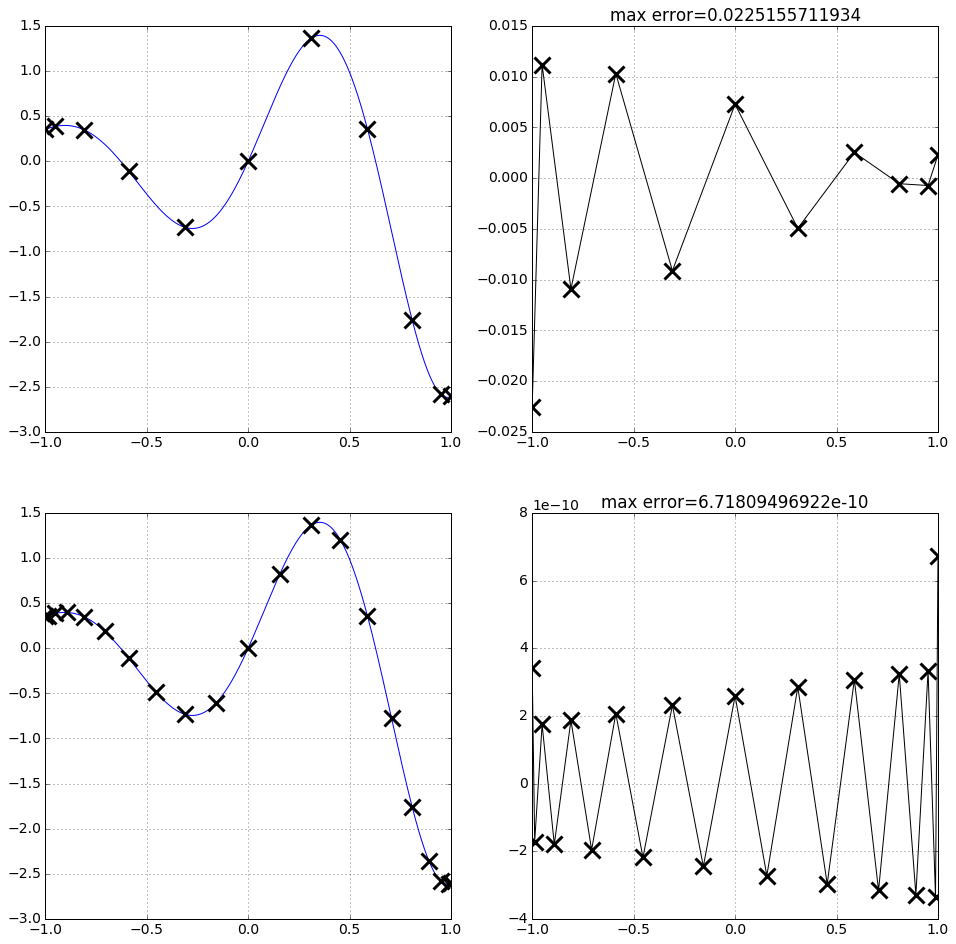

In [22]:
# Variable for plotting 'continuously'
x=np.linspace(-1,1,1e4)
# The function we will be studying
u= lambda x: np.exp(x)*np.sin(5*x)
# We just computed the derivative by hand
up= lambda x: np.exp(x)*(np.sin(5*x)+np.cos(5*x)*5)

plt.figure(figsize=(2*M,2*M))

N=10
DCheb,xCheb=cheb(N)
# Creating the grid functions
yy=u(xCheb)

plt.subplot(221)
plt.plot(x,u(x),'-')
plt.plot(xCheb,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(222)
plt.plot(xCheb,np.dot(DCheb,yy)-up(xCheb),'kx-',markersize=16,markeredgewidth=3)
error_max=np.max(np.abs(np.dot(DCheb,yy)-up(xCheb)))
plt.title('max error='+str(error_max))
plt.grid(True)

N=20
DCheb,xCheb=cheb(N)
# Creating the grid functions
yy=u(xCheb)

plt.subplot(223)
plt.plot(x,u(x),'-')
plt.plot(xCheb,yy,'kx',markersize=16,markeredgewidth=3)
plt.grid(True)

plt.subplot(224)
plt.plot(xCheb,np.dot(DCheb,yy)-up(xCheb),'kx-',markersize=16,markeredgewidth=3)
error_max=np.max(np.abs(np.dot(DCheb,yy)-up(xCheb)))
plt.title('max error='+str(error_max))
plt.grid(True)

plt.show()

# In-class work

## Implement Program 6, 7 and 12